### TASK 7: Get Basic Sales Summary from a Tiny SQLite Database using Python

#### _Objective_: Use SQL inside Python to pull simple sales info (like total quantity sold, total revenue), and display it using basic print statements and a simple bar chart.

In [17]:
# importing the required libraries

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
# -----------------------
# 1. Create / Connect to database
# -----------------------

# Connect to the SQLite database (creates sales_data.db if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the 'sales' table if it does not already exist
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [ ]:
# -----------------------
# Insert sample data into the sales table
# -----------------------
sales_data = [
    ("Apple", 10, 1.50),
    ("Banana", 20, 0.80),
    ("Orange", 15, 1.20),
    ("Apple", 5, 1.50),
    ("Banana", 8, 0.80),
    ("Grapes", 12, 2.50),
    ("Watermelon", 3, 4.00),
    ("Pineapple", 6, 3.20),
    ("Mango", 7, 2.80),
    ("Strawberry", 25, 0.50),
    ("Orange", 10, 1.20),
    ("Apple", 7, 1.50),
    ("Banana", 12, 0.80),
    ("Mango", 4, 2.80),
    ("Watermelon", 2, 4.00),
    ("Pineapple", 5, 3.20)
]

# Insert all records into the sales table
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sales_data)
conn.commit()

In [19]:
# -----------------------
# 2. SQL queries for summary metrics
# -----------------------

# Query to get the total quantity sold across all products
cursor.execute("SELECT SUM(quantity) FROM sales")
total_qty = cursor.fetchone()[0]  # fetchone() returns a tuple, so take index 0

# Query to get the total revenue (quantity * price) across all products
cursor.execute("SELECT SUM(quantity * price) FROM sales")
total_revenue = cursor.fetchone()[0]

# Display total sales metrics
print(f"Total Quantity Sold: {total_qty}")
print(f"Total Revenue: ${total_revenue:.2f}")

Total Quantity Sold: 604
Total Revenue: $894.00


In [20]:
# -----------------------
# 3. SQL for product-level summary
# -----------------------

# Query to get quantity sold and revenue grouped by product into a DataFrame
df = pd.read_sql_query("""
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
""", conn)

# Display the product-level summary using pandas
print("\nProduct Summary:")
print(df.to_string(index=False))  # prints without DataFrame index


Product Summary:
   product  total_qty  revenue
     Apple         88    132.0
    Banana        160    128.0
    Grapes         48    120.0
     Mango         44    123.2
    Orange        100    120.0
 Pineapple         44    140.8
Strawberry        100     50.0
Watermelon         20     80.0


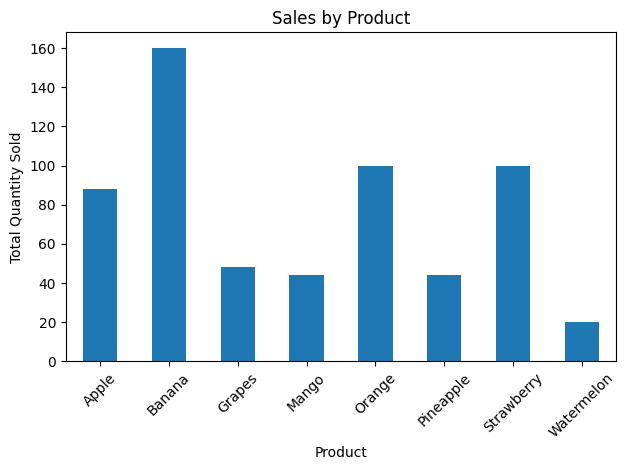

In [ ]:
# -----------------------
# 4. Bar chart using pandas DataFrame
# -----------------------
df.plot(kind='bar', x='product', y='total_qty', legend=False)
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.title("Sales by Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the database connection

conn.close()